In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
%matplotlib inline

Batch Gradient Descent without momentum

In [86]:
class LinearRegressionBatchGD:
    def __init__(self,x,y,iteration,alpha):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            self.theta=self.theta-(self.alpha*self.gradient)
        
            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0])
    

[[2.9000001 ]
 [6.69999981]
 [4.9000001 ]
 [7.9000001 ]
 [9.80000019]
 [6.9000001 ]
 [6.0999999 ]
 [6.19999981]
 [6.        ]
 [5.0999999 ]
 [4.69999981]
 [4.4000001 ]
 [5.80000019]] [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]
(13, 1) (13,)
<class 'numpy.ndarray'>


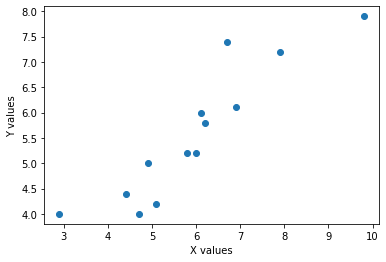

In [92]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/RegData.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
print(x,y)
print(x.shape,y.shape)
print(type(x))
xcpy=x.copy()
iteration=4000
alpha=0.01

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()


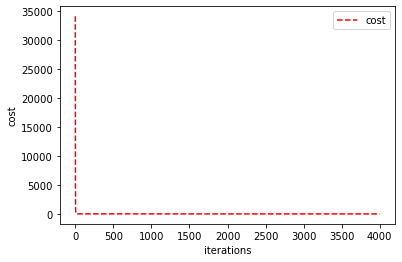

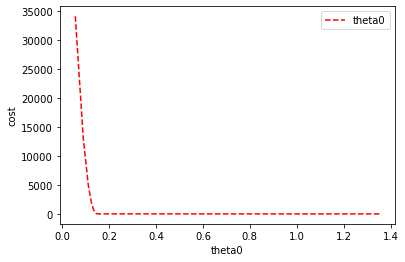

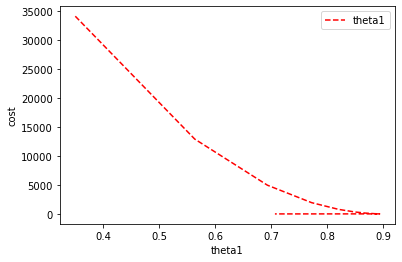

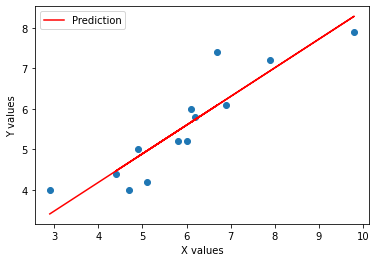

In [88]:
single_LR=LinearRegressionBatchGD(x,y,iteration,alpha) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist=single_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h, 'r-',label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [89]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [1.35373151 0.70709207]
predicted values =:  [3.40426805 6.0912509  4.81846966 6.93977207 8.28326366 6.23267126
 5.66699049 5.7377005  5.59628047 4.95988968 4.67704929 4.46491925
 5.45486045]
model accuracy using r2 score = 0.8210270116157344


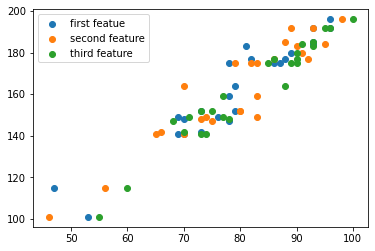

In [6]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/MultipleLR.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=1000
alpha=0.00008

plt.scatter(x[:,0],y,label="first featue")
plt.scatter(x[:,1],y,label='second feature')
plt.scatter(x[:,2],y,label='third feature')
plt.legend()
plt.show()


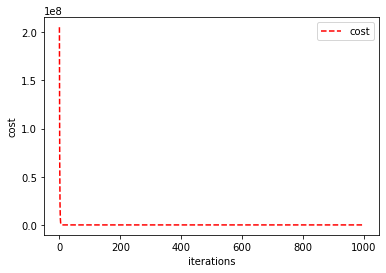

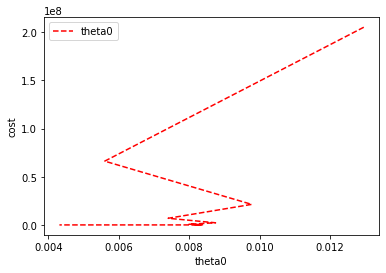

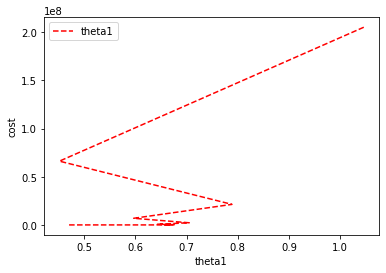

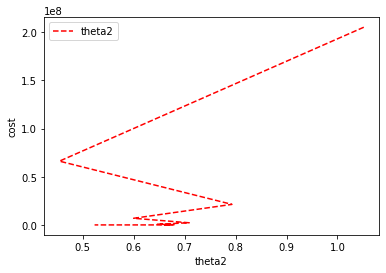

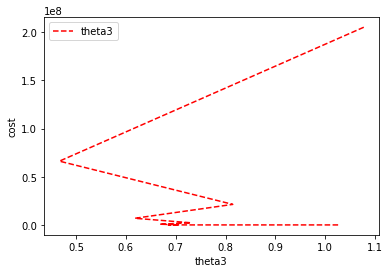

In [7]:
multi_LR=LinearRegressionBatchGD(x,y,iteration,alpha)  #multi variable linear regression using batch GD without momentum
theta,h,costhist,thetahist=multi_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,2],costhist,"r--",label="theta2")
plt.xlabel("theta2")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,3],costhist,"r--",label="theta3")
plt.xlabel("theta3")
plt.ylabel("cost")
plt.legend()
plt.show()


In [8]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [0.00431368 0.46702487 0.52307525 1.02622004]
predicted values =:  [152.9098778  184.90691628 181.52944807 198.72195215 140.45598614
 105.25989954 149.9548399  112.81853335 174.31788729 163.8206604
 143.75809708 142.63577899 186.51650801 153.66055021 150.92494987
 188.50825937 145.44748339 180.34747074 177.48110203 158.86704771
 175.64394491 174.39399135 167.07567723 151.77629898 190.97602363]
model accuracy using r2 score = 0.988406676886462


Mini-Batch Gradient Descent

In [9]:
class LinearRegressionMiniBatch:
    def __init__(self,x,y,iteration,alpha,batchsize):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.batchsize=batchsize #batchsize
        self.start=0 #start of the batch
        self.batches=self.m//self.batchsize #calculate number of batches
        self.end=self.batchsize #end of the batch
        
    def hypo(self,x,theta):
        return np.dot(x,theta)
    
    def loss(self,h,y):
        return (1/2*self.batchsize)*np.square((np.sum(h-y))) #cost function of minibatch
    
    def grad(self,h,y,x):
        return (1/self.batchsize)*np.dot(x.T,(h-y)) #gradient of mini batch
    def train(self):
        for i in range (self.iteration):  
            for j in range(self.batches): 
                self.h=self.hypo(self.x[self.start:self.end,:],self.theta)
                self.cost=self.loss(self.h,self.y[self.start:self.end])
                self.gradient=self.grad(self.h,self.y[self.start:self.end],self.x[self.start:self.end,:])
                self.theta=self.theta-(self.alpha*self.gradient)
                    
                #take the next batch
                
                self.start+=self.batchsize
                self.end+=self.batchsize
                    
                
            self.start,self.end=0,self.batchsize
            self.costhist.append(self.cost)
            
            self.thetahist=np.append(self.thetahist,self.theta)
        self.h=np.dot(self.x,self.theta)
            
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0])
    

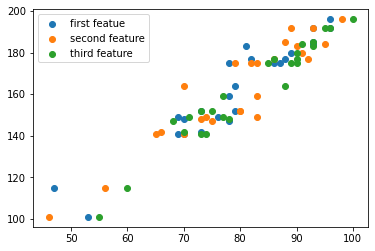

In [10]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/MultipleLR.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=6000
alpha=0.00001

plt.scatter(x[:,0],y,label="first featue")
plt.scatter(x[:,1],y,label='second feature')
plt.scatter(x[:,2],y,label='third feature')
plt.legend()
plt.show()

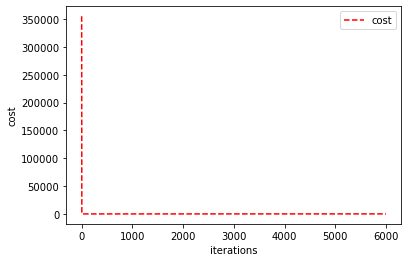

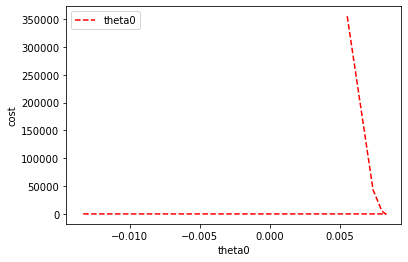

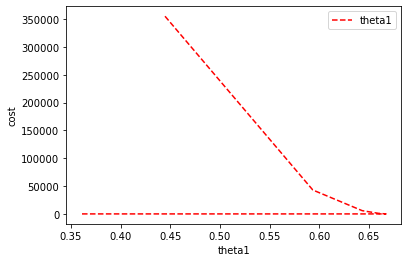

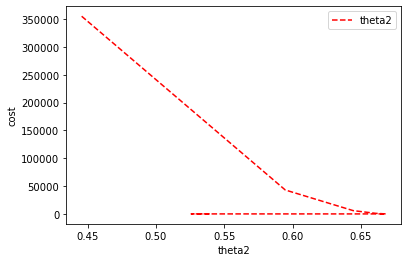

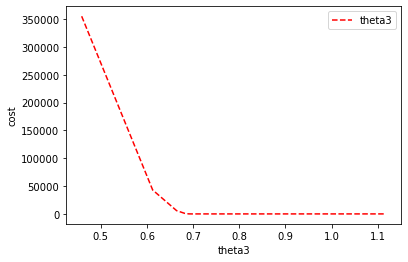

In [11]:
multi_LR=LinearRegressionMiniBatch(x,y,iteration,alpha,5) #multi variable linear regression using minibatch GD
theta,h,costhist,thetahist=multi_LR.train()



plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,2],costhist,"r--",label="theta2")
plt.xlabel("theta2")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,3],costhist,"r--",label="theta3")
plt.xlabel("theta3")
plt.ylabel("cost")
plt.legend()
plt.show()


In [12]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [-0.01344807  0.36084265  0.53923469  1.1179622 ]
predicted values =:  [153.3140052  184.96805525 181.78850213 199.26866547 140.17490858
 105.40392888 150.87115089 114.22103087 174.59600058 164.62022281
 144.24236334 143.02499475 186.50677367 153.24313669 151.81072105
 188.86117654 144.5963096  181.71641286 177.49504537 158.9718469
 176.56643016 174.73489979 167.9155445  151.54238841 190.98268103]
model accuracy using r2 score = 0.9887980757916366


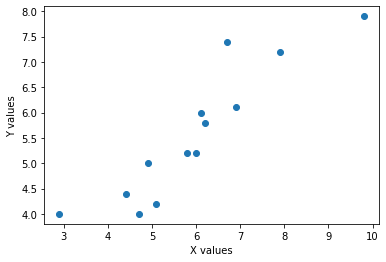

In [13]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/RegData.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=5000
alpha=0.004

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()


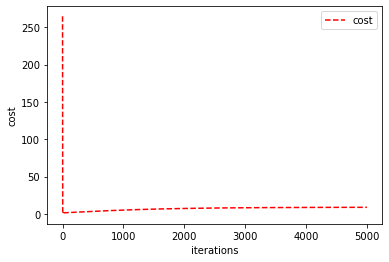

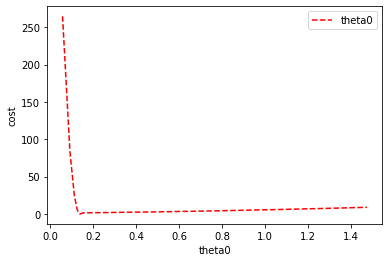

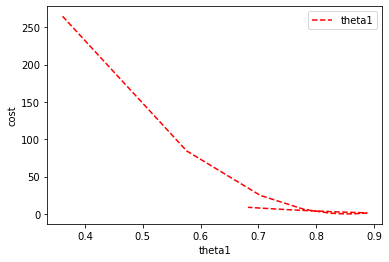

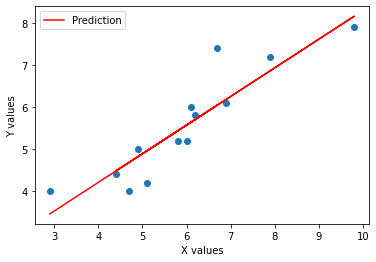

In [14]:
single_LR=LinearRegressionMiniBatch(x,y,iteration,alpha,4) #single linar Regression using mini batch GD

theta,h,costhist,thetahist=single_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h, 'r-',label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [15]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [1.47626561 0.68190948]
predicted values =:  [3.45380316 6.04505898 4.81762211 6.86335054 8.15897861 6.18144107
 5.63591335 5.70410424 5.56772247 4.95400388 4.68124002 4.47666737
 5.43134071]
model accuracy using r2 score = 0.8203623027770599


stochasic gradient descent

In [16]:
class LinearRegressionStochasticGD:
    def __init__(self,x,y,iteration,alpha):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return 2*np.dot(x.T,(h-y))
    
    def train(self):
        for i in range (self.iteration):
            for j in range (self.m): #to update theta after every observation
                self.h=self.hypo(self.x[j,:],self.theta)
                self.cost=self.loss(self.h,self.y[j])
                self.gradient=self.grad(self.h,self.y[j],self.x[j,:])

                self.theta=self.theta-(self.alpha*self.gradient)


            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
        self.h=np.dot(self.x,self.theta)
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0])
    

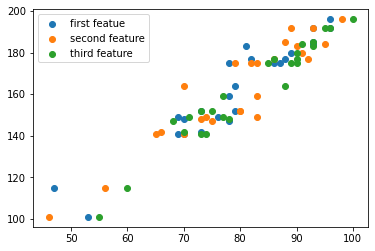

In [17]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/MultipleLR.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=5000
alpha=0.000001

plt.scatter(x[:,0],y,label="first featue")
plt.scatter(x[:,1],y,label='second feature')
plt.scatter(x[:,2],y,label='third feature')
plt.legend()
plt.show()

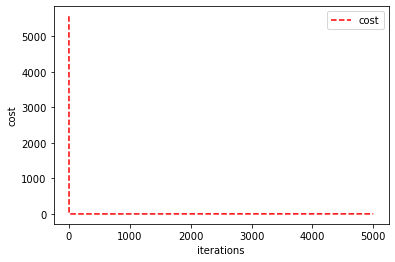

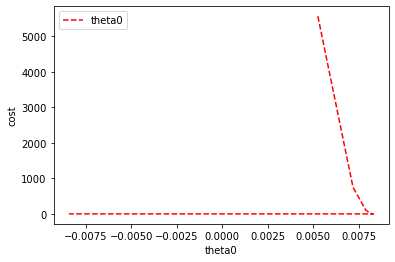

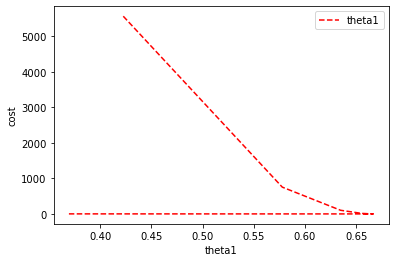

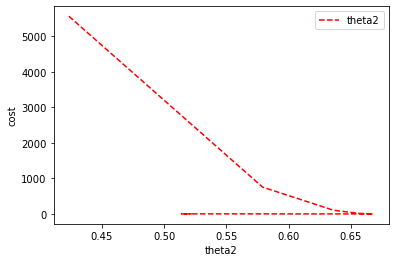

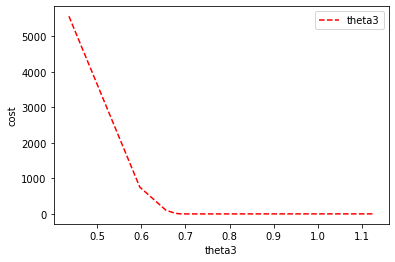

In [18]:
multi_LR=LinearRegressionStochasticGD(x,y,iteration,alpha) #multi variable linear regression using Stochastic GD
theta,h,costhist,thetahist=multi_LR.train()



plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,2],costhist,"r--",label="theta2")
plt.xlabel("theta2")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,3],costhist,"r--",label="theta3")
plt.xlabel("theta3")
plt.ylabel("cost")
plt.legend()
plt.show()


In [19]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [-0.00843084  0.36958121  0.52223388  1.12545103]
predicted values =:  [153.15853537 184.98614921 181.69817291 199.19538886 140.2200059
 105.50193858 150.79770928 114.13404523 174.69220391 164.78454721
 144.20696965 143.09083249 186.39088432 153.12512061 151.77050765
 188.88473618 144.51711485 181.5956424  177.34902147 158.82404515
 176.49993501 174.76387331 167.82765337 151.33217655 190.95696432]
model accuracy using r2 score = 0.9888511725482592


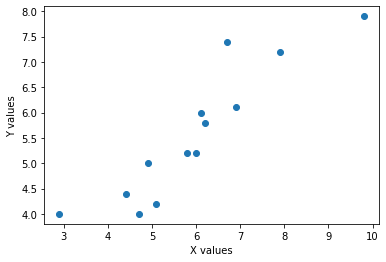

In [20]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/RegData.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=10000
alpha=0.0001

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()


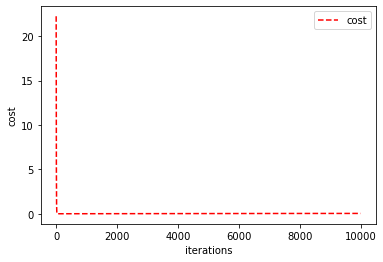

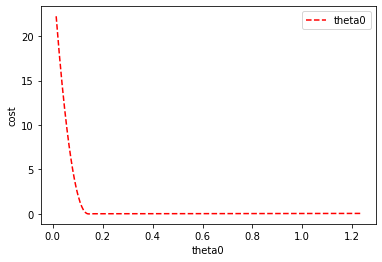

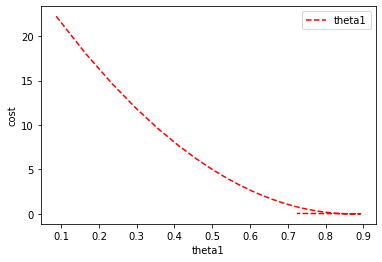

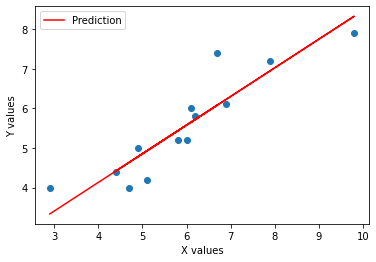

In [21]:
single_LR=LinearRegressionStochasticGD(x,y,iteration,alpha) #single linar Regression using Stochastic GD

theta,h,costhist,thetahist=single_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h, 'r-',label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [22]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [1.23300433 0.72419691]
predicted values =:  [3.33317543 6.08512348 4.78156925 6.95415998 8.33013418 6.22996307
 5.65060541 5.72302503 5.57818578 4.9264085  4.63672966 4.4194708
 5.43334654]
model accuracy using r2 score = 0.8194415119890817


Momentum Based GD

In [2]:
class LinearRegressionBatchGDMomentum:
    def __init__(self,x,y,iteration,alpha,momentum):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.momentum=momentum
        self.oldvt=0  #initial value for history of gradient
        self.vt=0
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            
            self.vt=(self.momentum*self.oldvt)+(self.alpha*self.gradient) #new value
            
            self.theta=self.theta-self.vt #update theta considering history of gradient
            self.oldvt=self.vt #set olt history to the current history to accumelate it for next iteration
        
            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0])
    

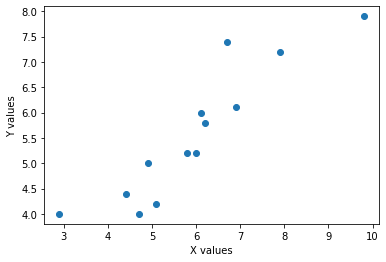

In [3]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/RegData.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=400
alpha=0.01

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()


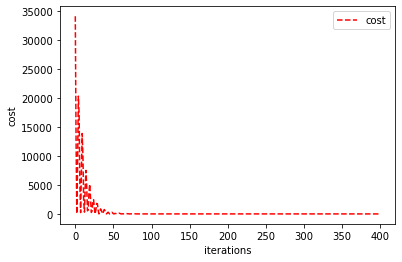

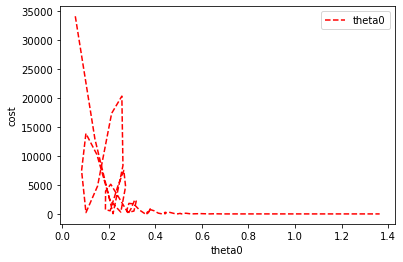

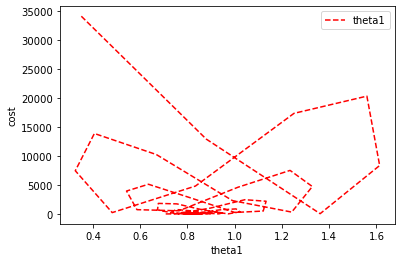

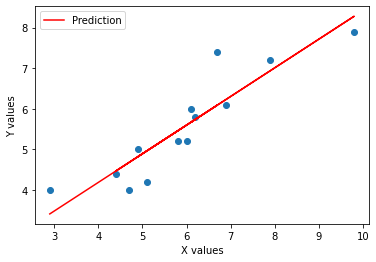

In [4]:
single_LR=LinearRegressionBatchGDMomentum(x,y,iteration,alpha,0.9) #single linear regression using batch GD with momentum

theta,h,costhist,thetahist=single_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h, 'r-',label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [5]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [1.36392292 0.70549921]
predicted values =:  [3.40958276 6.09079231 4.82074579 6.93749034 8.27809528 6.23190882
 5.66744347 5.73800156 5.59688539 4.96186196 4.67962928 4.46795503
 5.45576922]
model accuracy using r2 score = 0.8210925667345479


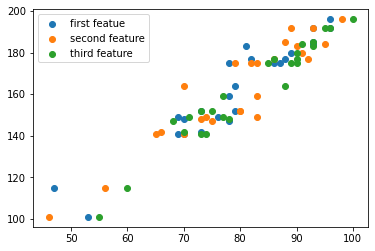

In [6]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/MultipleLR.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=600
alpha=0.00008

plt.scatter(x[:,0],y,label="first featue")
plt.scatter(x[:,1],y,label='second feature')
plt.scatter(x[:,2],y,label='third feature')
plt.legend()
plt.show()


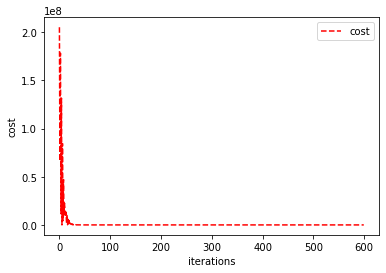

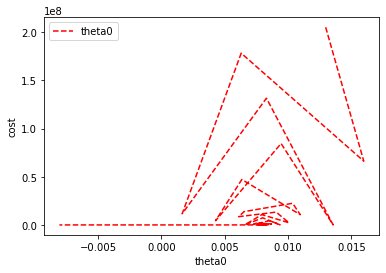

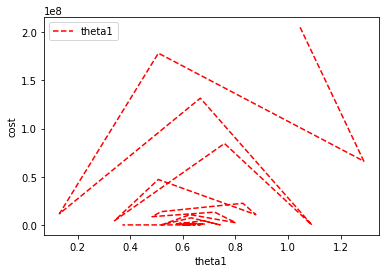

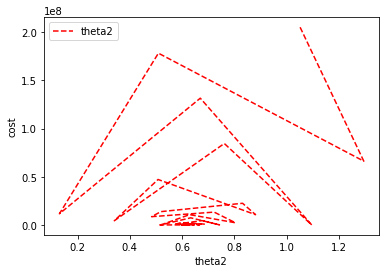

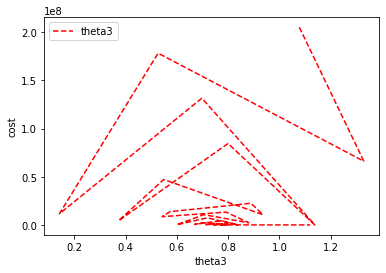

In [7]:
multi_LR=LinearRegressionBatchGDMomentum(x,y,iteration,alpha,0.8)  #multi variable linear regression using batch GD with momentum
theta,h,costhist,thetahist=multi_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,2],costhist,"r--",label="theta2")
plt.xlabel("theta2")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,3],costhist,"r--",label="theta3")
plt.xlabel("theta3")
plt.ylabel("cost")
plt.legend()
plt.show()


In [8]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [-0.00805381  0.36999674  0.52416062  1.11960605]
predicted values =:  [152.90484193 184.65140317 181.38484278 198.83987954 139.96916151
 105.29168241 150.51888839 113.91041496 174.3551014  164.43822377
 143.94410622 142.81306885 186.08121478 152.88613144 151.48438556
 188.53422253 144.29758484 181.25884376 177.06065988 158.5667111
 176.17369239 174.4378715  167.52320638 151.10920186 190.62140182]
model accuracy using r2 score = 0.9890040222476398


NAG

In [35]:
class LinearRegressionBatchGDNAG:
    def __init__(self,x,y,iteration,alpha,momentum):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.momentum=momentum
        self.oldvt=0  
        self.vt=0
        self.thetatemp=0
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            
            
            self.thetatemp=self.theta-(self.momentum*self.oldvt)
            self.htemp=self.hypo(self.x,self.thetatemp)
            self.gradienttemp=(1/self.m)*np.dot(x.T,self.htemp-y)
            
            self.theta=self.thetatemp-(self.alpha*self.gradienttemp)
            
            
            self.vt=(self.momentum*self.oldvt)+(self.alpha*self.gradienttemp)
            
             
            self.oldvt=self.vt
        
            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0])
    

In [36]:
thetatemp=thetat-gamma*vt-1
thetat+1=thetatemp-alpha*grad(thetatemp)
vt=gamma*vt-1+alpha*grad(thetatemp)
vt-1=vt




3shan a8seb grad temp basta5dem el hypothesis bta3 el theta de

SyntaxError: invalid syntax (<ipython-input-36-f42e21862da2>, line 9)

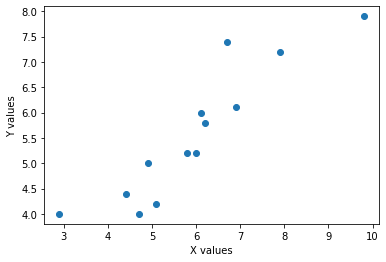

In [42]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/RegData.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=400
alpha=0.01

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()


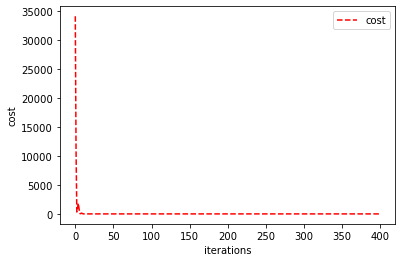

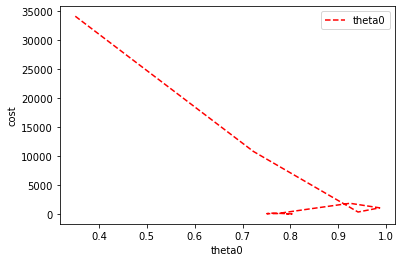

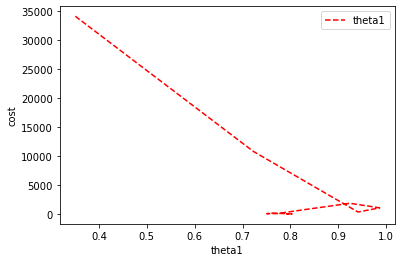

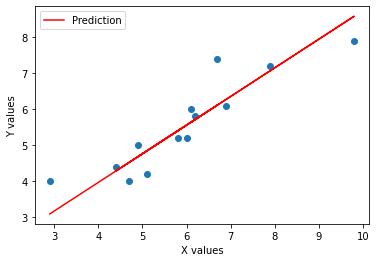

In [43]:
single_LR=LinearRegressionBatchGDNAG(x,y,iteration,alpha,0.9) #single linear regression using batch GD with NAG

theta,h,costhist,thetahist=single_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h, 'r-',label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [44]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [0.79434021 0.79434021]
predicted values =:  [3.09792689 6.11641946 4.68660731 7.06962794 8.57887441 6.27528773
 5.63981541 5.71924935 5.56038146 4.8454752  4.52773904 4.2894372
 5.40151357]
model accuracy using r2 score = 0.8030542716368543


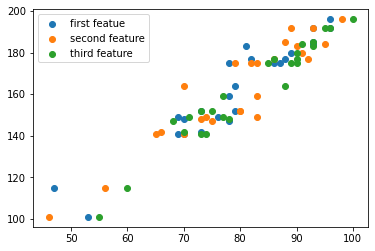

In [29]:
data=np.genfromtxt("C:/Users/LENOVO/Downloads/MultipleLR.csv",delimiter=",")
x,y=data[:,:-1],data[:,-1]
xcpy=x.copy()
iteration=600
alpha=0.00008

plt.scatter(x[:,0],y,label="first featue")
plt.scatter(x[:,1],y,label='second feature')
plt.scatter(x[:,2],y,label='third feature')
plt.legend()
plt.show()


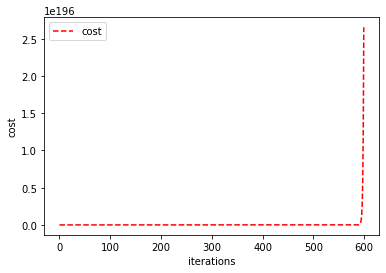

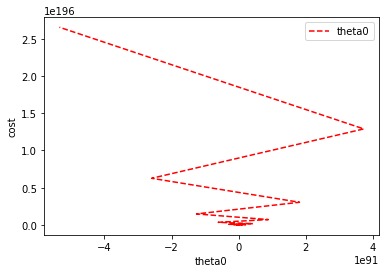

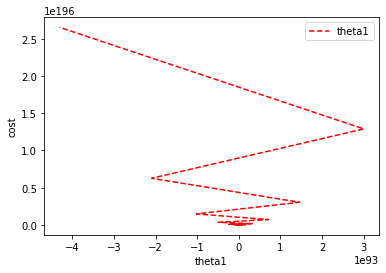

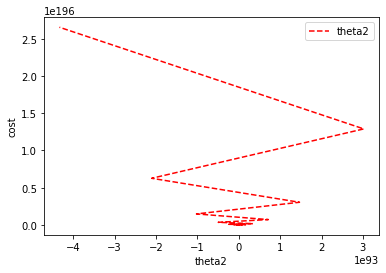

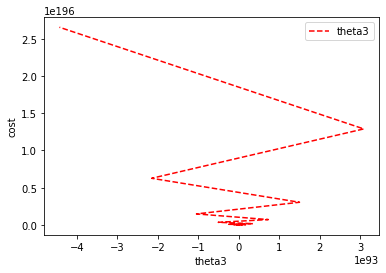

In [16]:
multi_LR=LinearRegressionBatchGDNAG(x,y,iteration,alpha,0.8)  #multi variable linear regression using batch GD with NAG
theta,h,costhist,thetahist=multi_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,2],costhist,"r--",label="theta2")
plt.xlabel("theta2")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,3],costhist,"r--",label="theta3")
plt.xlabel("theta3")
plt.ylabel("cost")
plt.legend()
plt.show()


In [17]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [-5.34212929e+91 -4.31169092e+93 -4.33541863e+93 -4.43653617e+93]
predicted values =:  [1.75131565e+96 2.10492280e+96 2.07401331e+96 2.25875594e+96
 1.60534891e+96 1.18355567e+96 1.69075423e+96 1.25341721e+96
 1.96719857e+96 1.82210042e+96 1.62895712e+96 1.60618664e+96
 2.14274459e+96 1.78125111e+96 1.69852612e+96 2.13599945e+96
 1.69641091e+96 2.02906833e+96 2.04280037e+96 1.82781882e+96
 1.98267871e+96 1.97469787e+96 1.89032829e+96 1.76574911e+96
 2.18150955e+96]
model accuracy using r2 score = -6.25107720029033e+189
